In [11]:
# Пример использования библиотеки BeautifulSoup
from bs4 import BeautifulSoup
import requests

r = requests.get('https://katerinabil.livejournal.com/9973.html?page=2')
# Вместо itemprop пришлось искать по классу элемента, т.к. скорее всего ЖЖ шаблоны изменил
BeautifulSoup(r.text, 'html.parser').find(class_='aentry-head__date').text

'  September 4 2018, 15:38  '

##  Блок 02 - Библиотека requests и курсы валют


In [14]:
import requests

request = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')

# Выводим ответ(объект) сервера
print (request)

# Выводим код ответа сервера
print (request.status_code)

# Выводим текст ответа сервера
print(request.text)

<Response [200]>
200
{
    "Date": "2021-12-31T11:30:00+03:00",
    "PreviousDate": "2021-12-30T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2021\/12\/30\/daily_json.js",
    "Timestamp": "2022-01-02T23:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 53.9141,
            "Previous": 53.2573
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 43.7273,
            "Previous": 43.3499
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 100.0573,
            "

In [16]:
# Так как ответ в формате json, то используем этот метод для получения списка
data = request.json()
data

{'Date': '2021-12-31T11:30:00+03:00',
 'PreviousDate': '2021-12-30T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2021/12/30/daily_json.js',
 'Timestamp': '2022-01-02T23:00:00+03:00',
 'Valute': {'AUD': {'ID': 'R01010',
   'NumCode': '036',
   'CharCode': 'AUD',
   'Nominal': 1,
   'Name': 'Австралийский доллар',
   'Value': 53.9141,
   'Previous': 53.2573},
  'AZN': {'ID': 'R01020A',
   'NumCode': '944',
   'CharCode': 'AZN',
   'Nominal': 1,
   'Name': 'Азербайджанский манат',
   'Value': 43.7273,
   'Previous': 43.3499},
  'GBP': {'ID': 'R01035',
   'NumCode': '826',
   'CharCode': 'GBP',
   'Nominal': 1,
   'Name': 'Фунт стерлингов Соединенного королевства',
   'Value': 100.0573,
   'Previous': 98.8254},
  'AMD': {'ID': 'R01060',
   'NumCode': '051',
   'CharCode': 'AMD',
   'Nominal': 100,
   'Name': 'Армянских драмов',
   'Value': 15.5164,
   'Previous': 14.9576},
  'BYN': {'ID': 'R01090B',
   'NumCode': '933',
   'CharCode': 'BYN',
   'Nominal': 1,
   'Name': '

In [17]:
# Извлекаем данные о курсах валют
data['Valute']

{'AUD': {'ID': 'R01010',
  'NumCode': '036',
  'CharCode': 'AUD',
  'Nominal': 1,
  'Name': 'Австралийский доллар',
  'Value': 53.9141,
  'Previous': 53.2573},
 'AZN': {'ID': 'R01020A',
  'NumCode': '944',
  'CharCode': 'AZN',
  'Nominal': 1,
  'Name': 'Азербайджанский манат',
  'Value': 43.7273,
  'Previous': 43.3499},
 'GBP': {'ID': 'R01035',
  'NumCode': '826',
  'CharCode': 'GBP',
  'Nominal': 1,
  'Name': 'Фунт стерлингов Соединенного королевства',
  'Value': 100.0573,
  'Previous': 98.8254},
 'AMD': {'ID': 'R01060',
  'NumCode': '051',
  'CharCode': 'AMD',
  'Nominal': 100,
  'Name': 'Армянских драмов',
  'Value': 15.5164,
  'Previous': 14.9576},
 'BYN': {'ID': 'R01090B',
  'NumCode': '933',
  'CharCode': 'BYN',
  'Nominal': 1,
  'Name': 'Белорусский рубль',
  'Value': 29.1458,
  'Previous': 29.1608},
 'BGN': {'ID': 'R01100',
  'NumCode': '975',
  'CharCode': 'BGN',
  'Nominal': 1,
  'Name': 'Болгарский лев',
  'Value': 42.9487,
  'Previous': 42.492},
 'BRL': {'ID': 'R01115',
  '

In [41]:
# Упражнение: извлечь код(ID) валюты из словаря Valute по ключу INR 
data['Valute']['INR']['ID']

'R01270'

In [66]:
# Определим функцию которая по названию валюты будет выводить полную информацию 'full' 
# или только текущий курс валюты 'value' из словаря Valute.
# В функции реализована проверка валюты и формата на допустимые
def exchange_rates(currency, format = 'full'):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    if currency in response:
        data = response[currency]
    else:
        return 'Unknown currency!'
    if format == 'full':
        return data
    elif format == 'value':
        return data['Value']
    else:
        return 'Unknown format!'

In [61]:
exchange_rates('USD')

{'ID': 'R01235',
 'NumCode': '840',
 'CharCode': 'USD',
 'Nominal': 1,
 'Name': 'Доллар США',
 'Value': 74.2926,
 'Previous': 73.6514}

In [60]:
exchange_rates('USD', 'value')

74.2926

In [63]:
exchange_rates('USD', 'small')

'Unknown format!'

In [64]:
exchange_rates('EUR')

{'ID': 'R01239',
 'NumCode': '978',
 'CharCode': 'EUR',
 'Nominal': 1,
 'Name': 'Евро',
 'Value': 84.0695,
 'Previous': 83.204}

In [67]:
exchange_rates('USD/EUR')

'Unknown currency!'

In [95]:
# Проверочное задание: написать функцию которая по ID валюты возвращает её название на русском языке.
# ID --> ID, Name --> Название на русском языке, для быстрой обработки запросов думаю нужно создать
# словарь ID <-> Name, но буду использовать обычный перебор в цикле, т.к. объём данных не большой.

def id_to_name(ID):
    response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()['Valute']
    for key in response:
        if response[key]['ID'] == ID:
            return response[key]['Name']
    return 'Указаный ID не найден'

In [99]:
# Проверка на неверный ID
id_to_name('R0101')

'Указаный ID не найден'

In [97]:
# Возвращает 'Турецких лир', т.к. номинал у этой валюты на бирже 10
id_to_name('R01700J')

'Турецких лир'

In [98]:
# Ответ на задание
id_to_name('R01565')

'Польский злотый'

## Блок 03 - Удобный парсинг HTML-страниц

In [100]:
import requests

url = 'https://lenta.ru/articles/2018/07/01/pobeda/'
r = requests.get(url)
# Смотрим код ответа сервера и понимаем всё ли прошло успешно
print(r.status_code)

200


In [101]:
# Смотрим блок text в объекте r
print(r.text)

<!DOCTYPE html><html lang="ru"><head><title>«Простите, парни, что поливал вас дерьмом на каждом углу» Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru</title><meta charset="utf-8" />
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoLRggfRlpICFcSTkVdC0Y=","queueTime":0,"applicationTime":265,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk=",licenseKey:"66a8d51230",applicationID:"1241738"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_re

In [102]:
# Импортируем библиотеку BeautifulSouabsp
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

# Смотрим на результат работы html-parser 
print(soup)

<!DOCTYPE html>
<html lang="ru"><head><title>«Простите, парни, что поливал вас дерьмом на каждом углу» Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru</title><meta charset="utf-8"/>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoLRggfRlpICFcSTkVdC0Y=","queueTime":0,"applicationTime":265,"agent":""}</script>
<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk=",licenseKey:"66a8d51230",applicationID:"1241738"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_re

In [103]:
# Получаем <title>
soup.title

<title>«Простите, парни, что поливал вас дерьмом на каждом углу» Россия уделала Испанию на чемпионате мира. Вся страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru</title>

In [104]:
soup.title.text

'«Простите, парни, что поливал вас дерьмом на каждом углу» Россия уделала Испанию на чемпионате мира. Вся\xa0страна в шоке и ликует: Coцсети: Интернет и СМИ: Lenta.ru'

In [109]:
soup.find(class_='topic-header__title')

<span class="topic-header__title">«Простите, парни, что поливал вас дерьмом на каждом углу»</span>

In [110]:
soup.find(class_='topic-header__title').text

'«Простите, парни, что поливал вас дерьмом на каждом углу»'

In [117]:
topic = soup.find('div', class_='topic-header__left-box')
topic

<div class="topic-header__left-box"><div class="topic-header__item"><button class="bookmark js-bookmark" data-topic-link="/articles/2018/07/01/pobeda/"><svg class="bookmark__icon"><use xlink:href="#ui-bookmark"></use></svg></button></div><time class="topic-header__item topic-header__time">21:20, 1 июля 2018</time><a class="topic-header__item topic-header__rubric" href="/rubrics/media/">Интернет и СМИ</a></div>

In [118]:
# Получаем время и дату публикации статьи
topic.find(class_='topic-header__item topic-header__time').text

'21:20, 1 июля 2018'

In [120]:
# Можно было и так, поскольку класс 'topic-header__item topic-header__time' уникален в данном документе. 
soup.find(class_='topic-header__item topic-header__time').text

'21:20, 1 июля 2018'

In [124]:
soup.find(class_='topic-body__content-text _lead').text

'Сборная России обыграла Испанию и вышла в четвертьфинал чемпионата мира по футболу. Многие ждали от встречи с сильнейшей команды планеты хотя бы нестыдной борьбы, а в итоге получили исторический матч — 4:3, результат превзошел все ожидания. Шок, ликование на улицах, а в соцсетях\xa0— пожар, эмоции переполняют болельщиков.'

In [127]:
# Поиск всех ссылок в тексте новости
for link in soup.find(class_='topic-page__body').find_all('a'):
    print(link)

<a href="https://lenta.ru/news/2018/07/01/russia_win/" target="_blank">обыграла</a>
<a href="https://twitter.com/lixoradkaenota/status/1013465983061778433"><time datetime="2018-07-01T19:54:54+03:00">01 июля 2018 г.</time></a>
<a href="https://twitter.com/newfag_in_life/status/1013462966782582785"><time datetime="2018-07-01T19:42:55+03:00">01 июля 2018 г.</time></a>
<a href="https://twitter.com/vitalypetrov/status/1013467931257311232"><time datetime="2018-07-01T20:02:38+03:00">01 июля 2018 г.</time></a>
<a href="https://twitter.com/Borisich_glass/status/1013465759799042048"><time datetime="2018-07-01T19:54:01+03:00">01 июля 2018 г.</time></a>
<a href="https://twitter.com/a_ziuzenok/status/1013471409979445249"><time datetime="2018-07-01T20:16:28+03:00">01 июля 2018 г.</time></a>
<a href="https://twitter.com/salt1s/status/1013465249989775360"><time datetime="2018-07-01T19:51:59+03:00">01 июля 2018 г.</time></a>
<a href="https://twitter.com/MaratQasem/status/1013470315492585474"><time date

In [128]:
# Извлечём значения href из всех ссылок
for link in soup.find(class_='topic-page__body').find_all('a'):
    print(link.get('href'))

https://lenta.ru/news/2018/07/01/russia_win/
https://twitter.com/lixoradkaenota/status/1013465983061778433
https://twitter.com/newfag_in_life/status/1013462966782582785
https://twitter.com/vitalypetrov/status/1013467931257311232
https://twitter.com/Borisich_glass/status/1013465759799042048
https://twitter.com/a_ziuzenok/status/1013471409979445249
https://twitter.com/salt1s/status/1013465249989775360
https://twitter.com/MaratQasem/status/1013470315492585474
https://twitter.com/Instigator_88/status/1013468227370962944
https://twitter.com/milligantop/status/1013468156373950464
https://twitter.com/she_lova_/status/1013463135477551108
https://twitter.com/Fall_Out_Daria/status/1013463774253248512
/tags/persons/akinfeev-igor/
https://twitter.com/valyagorushkina/status/1013467293144305665
https://twitter.com/Alisa06101/status/1013466591034511369
https://twitter.com/quad_axels/status/1013469038406701056
https://twitter.com/GuyFloral/status/1013467692601184256
https://twitter.com/maleenkiymyc/st

## Блок 04 - Чтение HTML-таблиц в Pandas

In [139]:
# Импортируем библиотеку BeautifulSouabsp
from bs4 import BeautifulSoup
import pandas as pd
import requests

url = 'https://www.cbr.ru/key-indicators/'
r = requests.get(url)

r.text

'\r\n<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    \r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n<meta name="format-detection" content="telephone=no" />\r\n<meta name="zoom:lang" content="ru" />\r\n<title>Ключевые показатели | Банк России</title>\r\n\r\n\r\n\r\n    <meta property="og:image" content="/common/images/share-1.jpg" />\r\n\r\n    \r\n\r\n\r\n            <link rel="stylesheet" type="text/css" href="/common/libs/jquery-ui/jquery-ui.min.css?v=v599209514" media="all">\r\n\r\n            <!--[if IE 9]><link rel="stylesheet" type="text/css" href="/common/style/main-ie9.css?v=v638638290" media="all"><![endif]-->\r\n\r\n            <!--[if gt IE 9]><!--><link rel="stylesheet" type="text/css" href="/common/style/main.min.css?v=v584953042" media="all"><!--<![endif]-->\r\n\r\n\r\n        <script type=

In [138]:
pd.read_html('module_11_cbr.html')[3]

,рублей за грамм,06.09.2018
0,Золото Au,"↑2 629,69"
1,Серебро Ag,"↓31,19"
2,Платина Pt,"↓1 703,67"
3,Палладий Pd,"↑2 161,51"


In [146]:
soup = BeautifulSoup(r.text, 'html.parser')
soup.text

'\n\n\n\n\n\n\n\n\nКлючевые показатели | Банк России\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nул. Неглинная, 12, Москва, 107016\n8 800 300-30-00\nwww.cbr.ru\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nПоиск по сайту\n\n\n\n\nИнтернет-приемная\n\nRU\nEN\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nПоиск по сайту\n\n\n\n\nИнтернет-приемная\n\nRU\nEN\n\n\n\n\n\n\n\n\n\n\n\n\n\nЧто вы хотите найти?\n\n\n\n\n\n\n\n\nИскать\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nДеятельность\nФинансовые рынки\nДокументы и данные\nО Банке России\nСервисы\n\n\nКоронавирус: поддержка экономики, бизнеса, граждан\n\n+7 499 300-30-008 800 300-30-00300Бесплатно для звонков с мобильных телефонов\n\nНовости\nРешения Банка России\nКонтактная информация\nКарта сайта\nО сайте\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nПроверить финансовую организацию\n\n\n\n\n\n\n\n\n\n\n\n\nКлючевые показатели\n\n\n\nИнфляция\n\n\n\nЦель по инфляции\n\n\n4,0%\r\n\t\t\t\t\t\t\n\n\n\nДекабрь 2021\n\n\n8,4%\r\n\t\t\t\t\t\t\n\n\n\n\

In [150]:
# Пришлось добавить encoding = 'utf-8' иначе получал ошибку декодирования символа при парсинге страницы
soup = BeautifulSoup(open('module_11_cbr.html', 'r', encoding='utf-8'), 'html.parser')

In [152]:
data = soup.find(class_='widget type_table name_metal opened').find(class_='content').find('table')
data

<table>
<tbody>
<tr>
<th class="title">рублей за грамм</th>
<th>06.09.2018</th>
</tr>
<tr>
<td class="title">
                      Золото <ins>Au</ins>
</td>
<td>
<div class="w_data_wrap"><i class="up" title="+ 4,9600">↑</i><span class="nowrap">2 629,69</span></div>
</td>
</tr>
<tr>
<td class="title">
                      Серебро <ins>Ag</ins>
</td>
<td>
<div class="w_data_wrap"><i class="down" title="- 0,0900">↓</i><span class="nowrap">31,19</span></div>
</td>
</tr>
<tr>
<td class="title">
                      Платина <ins>Pt</ins>
</td>
<td>
<div class="w_data_wrap"><i class="down" title="- 4,0800">↓</i><span class="nowrap">1 703,67</span></div>
</td>
</tr>
<tr>
<td class="title">
                      Палладий <ins>Pd</ins>
</td>
<td>
<div class="w_data_wrap"><i class="up" title="+ 41,0900">↑</i><span class="nowrap">2 161,51</span></div>
</td>
</tr>
</tbody>
</table>

In [153]:
df = pd.read_html(str(data))[0]
df

,рублей за грамм,06.09.2018
0,Золото Au,"↑2 629,69"
1,Серебро Ag,"↓31,19"
2,Платина Pt,"↓1 703,67"
3,Палладий Pd,"↑2 161,51"


## Блок 05 - Введение в работу с API ВКонтакте

In [50]:
# Читаем конфигурацию из yaml-файла, т.к. произошли некоторые изменения и появились устаревшие методы, 
# то импортируем всю библиотеку yaml
import yaml

# файл yaml делается на коленке за 5сек. а токены хранятся где-то там!
f = open('config.yaml', mode='r', encoding='utf-8')

# Теперь это возмозно так config = load(f, Loader=yaml.FullLoader), метод load без указания параметра 
# Loader считается небезопасным. Так же использовал синтаксический сахар:
config = yaml.full_load(f)

# print(config)

In [21]:
token = config['access_token']
# print (token)

In [17]:
# На 11.01.2022 года вместо указанной версии API 5.52 необходимо использовать версию 5.131
# Запросим пользователя с id = 1
# https://api.vk.com/method/users.get?user_id=1&v=5.131&access_token=token
#
# {"response":[{"id":1,"first_name":"Pavel","last_name":"Durov","can_access_closed":true,"is_closed":false}]}
#
# Запросим дополнительно пол и дату рождения пользователя
# https://api.vk.com/method/users.get?user_id=1&v=5.131&fields=sex,bdate&access_token=token
#
# {"response":[{"id":1,"first_name":"Pavel","last_name":"Durov","can_access_closed":true,"is_closed":false,
# "sex":2,"bdate":"10.10.1984"}]}
# 2 - Мужской пол

In [15]:
# Задание: Какое значение ID у страны, указанной в профиле Павла Дурова 
# (ID отдается вместе с названием страны)? Укажите ответ в виде целого числа.

# https://api.vk.com/method/users.get?user_id=1&v=5.131&fields=sex,bdate,country&access_token=token
# {"response":[{"id":1,"first_name":"Pavel","last_name":"Durov","can_access_closed":true,"is_closed":false,
# "sex":2,"bdate":"10.10.1984","country":{"title":"Russia","id":1}}]}

# Ответ: id = 1

In [23]:
# Теперь всё тожеб только средствами python3
import requests

url = 'https://api.vk.com/method/users.get'
# Создаём словарь с параметрами запроса
params = {
    'user_id': 1,
    'v': 5.131,
    'fields': 'sex, bdate',
    'access_token': token
}

# Отправим запрос с параметрами и посмотрим на ответ
r = requests.get(url, params)
r.text

'{"response":[{"id":1,"first_name":"Pavel","last_name":"Durov","can_access_closed":true,"is_closed":false,"sex":2,"bdate":"10.10.1984"}]}'

In [24]:
# Улучшим читаемость с помощью команды pprint

from pprint import pprint

data = r.json()
pprint(data)

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Pavel',
               'id': 1,
               'is_closed': False,
               'last_name': 'Durov',
               'sex': 2}]}


In [25]:
data['response']

[{'id': 1,
  'first_name': 'Pavel',
  'last_name': 'Durov',
  'can_access_closed': True,
  'is_closed': False,
  'sex': 2,
  'bdate': '10.10.1984'}]

In [26]:
data['response'][0]

{'id': 1,
 'first_name': 'Pavel',
 'last_name': 'Durov',
 'can_access_closed': True,
 'is_closed': False,
 'sex': 2,
 'bdate': '10.10.1984'}

In [29]:
birthday = data['response'][0]['bdate']
print(birthday)

10.10.1984


In [47]:
# Задание: Имеется набор ID пользователей users. Необходимо посчитать какую долю этих пользователей 
# составляют женщины. Не учитывайте пользователей, у которых пол не указан.

users = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
url = 'https://api.vk.com/method/users.get'

# Взводим счётчики пользователей
true_users = male = female = not_true_users = 0

for user in users:
    params = {
        'user_id': user,
        'v': 5.131,
        'fields': 'sex, bdate',
        'access_token': token
    }
    r = requests.get(url, params)
    sex = r.json()['response'][0]['sex']
#    print(sex)
    if sex == 0:
        not_true_users += 1
    else:
        if sex == 1:
            female += 1
        elif sex == 2:
            male += 1
        true_users += 1
#    print(true_users, female, male, not_true_users)
result_f = female / true_users
result_m = male / true_users
# Посчитаем чуть больше чем нужно
print('Всего настоящих пользователей (человек) = {0}'.format(true_users))
print('Доля пользователей мужского пола = {:.2f}'.format(result_m))
print('Всего пользователей мужского пола = {0}'.format(male))
print('Доля пользователей женского пола = {:.2f}'.format(result_f))
print('Всего пользователей женского пола = {0}'.format(female))
print('ХЗ КТО ОНИ (единиц) = {:.2f}'.format(not_true_users))

Всего настоящих пользователей (человек) = 8
Доля пользователей мужского пола = 0.75
Всего пользователей мужского пола = 6
Доля пользователей женского пола = 0.25
Всего пользователей женского пола = 2
ХЗ КТО ОНИ (единиц) = 2.00


## Блок 06 - Статистика пользователей группы

In [12]:
# Думал через библиотеки vk и vk_api будет легче сделать запрос! Фиг там, просто в группе habr 
# использованной для примера закрыт просмотр id пользователей. Использовал группу с id = 1
import requests
import yaml

# файл yaml делается на коленке за 5сек. а токены хранятся где-то там!
f = open('config.yaml', mode='r', encoding='utf-8')

config = yaml.full_load(f)
token = config['vk_app_access_token']

url = 'https://api.vk.com/method/groups.getMembers'
params = {
    'group_id': 1,
    'v': 5.131,
    'access_token': token
}

r = requests.get(url, params = params)
data = r.json()
data

{'response': {'count': 383447,
  'items': [5,
   6,
   11,
   23,
   34,
   37,
   39,
   46,
   47,
   48,
   56,
   121,
   134,
   149,
   175,
   193,
   243,
   341,
   364,
   404,
   467,
   510,
   550,
   620,
   638,
   669,
   702,
   744,
   749,
   804,
   809,
   880,
   907,
   952,
   966,
   1000,
   1043,
   1080,
   1092,
   1115,
   1119,
   1159,
   1216,
   1332,
   1359,
   1405,
   1500,
   1508,
   1523,
   1531,
   1543,
   1586,
   1615,
   1634,
   1668,
   1699,
   1752,
   1754,
   1757,
   1773,
   1834,
   1840,
   1843,
   2103,
   2149,
   2201,
   2298,
   2486,
   2622,
   2671,
   2725,
   2770,
   2827,
   2981,
   2982,
   3050,
   3250,
   3254,
   3287,
   3384,
   3402,
   3420,
   3422,
   3436,
   3443,
   3450,
   3455,
   3458,
   3472,
   3520,
   3637,
   3653,
   3714,
   3775,
   4010,
   4026,
   4041,
   4136,
   4159,
   4189,
   4256,
   4440,
   4525,
   4565,
   4568,
   4615,
   4617,
   4669,
   4718,
   4731,
   4767,
   4841,


In [25]:
# Каким из перечисленных способов можно посчитать количество пользователей в data,
# у которых ID больше 1000?

# len([x['response']['users'] for x in data if x > 1000])
#TypeError: '>' not supported between instances of 'str' and 'int'

# len([x for x in data['response'] if x['users'] > 1000])
# TypeError: string indices must be integers

# Правильный ответ
# len([x for x in data['response']['users'] if x > 1000])
# KeyError: 'users'
# Исправим ошибку вместо users необходимо указать items
len([x for x in data['response']['items'] if x > 1000])
# [x for x in data['response']['items'] if x > 1000]

964

In [29]:
# Выгрузка более 1000 пользователей возможна с использованием параметра offset.
# Для отладки алгоритма такой выгрузки используем списки меньшей длины 5 id за раз и всего 20 id

# Список-образец для проверки работы алгоритма
users_for_checking = data['response']['items'][:20]
print (users_for_checking)

[5, 6, 11, 23, 34, 37, 39, 46, 47, 48, 56, 121, 134, 149, 175, 193, 243, 341, 364, 404]


In [33]:
#
count = 5
offset = 0
user_id = []
while offset < 20:
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))
    params = {
        'group_id': 1,
        'v': 5.131,
        'count': count,
        'offset': offset,
        'access_token': token
    }
    r = requests.get(url, params = params)
    data = r.json()
    user_id += data['response']['items']
    
    # Увеличиваем offset на count
    offset += count
    
print(user_id)

# Проверка

print('Проверка правильной работы алгоритма: ' + str(users_for_checking == user_id))

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[5, 6, 11, 23, 34, 37, 39, 46, 47, 48, 56, 121, 134, 149, 175, 193, 243, 341, 364, 404]
Проверка правильной работы алгоритма: True


In [4]:
# Задание: Сделайте запрос методом groups.getMembers с параметром offset, превышаюшим текущее количество участников группы с id = 1.
# Что вы получите в качестве значения ключа 'users'?

# Так как на данный момент в группе с id = 1 находится меньше 384000 пользователей, то использую такой offset
params = {
    'group_id': 1,
    'v': 5.131,
    'offset': 384000,
    'count': 1000,
    'access_token': token
}

r = requests.get(url, params = params)
data = r.json()
data
# В результате имеем пустой список items[]

{'response': {'count': 383447, 'items': []}}

In [1]:
# Ограничение по запросам в секунду. Используем библиотеку time
import requests
import yaml
import time

# файл yaml делается на коленке за 5сек. а токены хранятся где-то там!
f = open('config.yaml', mode='r', encoding='utf-8')

config = yaml.full_load(f)
token = config['vk_app_access_token']

url = 'https://api.vk.com/method/groups.getMembers'
count = 1000
offset = 0
user_id = []
while offset < 10000:
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))
    params = {
        'group_id': 1,
        'v': 5.131,
        'count': count,
        'offset': offset,
        'access_token': token
    }
    r = requests.get(url, params = params)
    data = r.json()
    user_id += data['response']['items']
    
    # Увеличиваем offset на count
    offset += count
    
    print('Ожидаю 0.5 секунды...')
    time.sleep(0.5)

print(' ')
print('Длина списка пользователей: ' + str(len(user_id)))

Выгружаю 1000 пользователей с offset = 0
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 1000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 2000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 3000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 4000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 5000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 6000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 7000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 8000
Ожидаю 0.5 секунды...
Выгружаю 1000 пользователей с offset = 9000
Ожидаю 0.5 секунды...
 
Длина списка пользователей: 10000


In [53]:
# Статистика пользователей по городам
import requests
import yaml
from pprint import pprint

# файл yaml делается на коленке за 5сек. а токены хранятся где-то там!
f = open('config.yaml', mode='r', encoding='utf-8')

config = yaml.full_load(f)
token = config['vk_app_access_token']
url = 'https://api.vk.com/method/users.get'
# Создаём словарь с параметрами запроса
params = {
    'user_ids': '1, 2, 3, 4, 5',
    'v': 5.131,
    'fields': 'sex, bdate, city',
    'access_token': token
}

# Отправим запрос с параметрами и посмотрим на ответ
r = requests.get(url, params=params)
pprint(r.json())



{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'city': {'id': 2, 'title': 'Saint Petersburg'},
               'first_name': 'Pavel',
               'id': 1,
               'is_closed': False,
               'last_name': 'Durov',
               'sex': 2},
              {'can_access_closed': False,
               'first_name': 'Alexandra',
               'id': 2,
               'is_closed': True,
               'last_name': 'Vladimirova',
               'sex': 1},
              {'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'last_name': '',
               'sex': 0},
              {'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 4,
               'last_name': '',
               'sex': 0},
              {'bdate': '18.11',
               'can_access_closed': True,
               'city': {'id': 1, 'title': 'Moscow'},
               'first_name': 'I

In [1]:
# Ограничение по запросам в секунду. Используем библиотеку time
import requests
import yaml
import time

start_time = time.perf_counter()
# файл yaml делается на коленке за 5сек. а токены хранятся где-то там!
f = open('config.yaml', mode='r', encoding='utf-8')

config = yaml.full_load(f)
token = config['vk_app_access_token']

# Получаю количество пользователей в группе с id = 1
# Для этого сделаю дополнительный запрос к vk api, скорее всего это не оптимально,
# но по-другому пока не знаю как сделать.

url = 'https://api.vk.com/method/groups.getMembers'

params = {
    'group_id': 1,
    'v': 5.131,
    'count': 1,
    'access_token': token
}
r = requests.get(url, params=params)
data = r.json()
users_count = data['response']['count']

count = 1000
offset = 0
users_id = []
# Ждать 384000 городов просто жесть...
# while offset < users_count:
while offset < count:
    # print('Выгружаю {} пользователей с offset = {}'.format(count, offset))
    params = {
        'group_id': 1,
        'v': 5.131,
        'count': count,
        'offset': offset,
        'access_token': token
    }
    r = requests.get(url, params = params)
    data = r.json()
    users_id += data['response']['items']
    
    # Проверка условия offset + count > users_count, необходима для того чтобы вычитать всех пользователей
    if (offset + count) > users_count:
        # уменьшаем значение count с 1000 пользователей, до остаточного значения.
        count = offset + count - users_count
    # Увеличиваем offset на count
    offset += count
    
    # print('Ожидаю 0.5 секунды...')
    time.sleep(0.5)

print('Готово!')    
middle_time = time.perf_counter()

# Получим 
# Теперь разобьём этот лист на 100 частей по 100 id пользователей в каждом
row_limit = 100
users_lists = []
position = 0
while position < len(users_id):
    users_lists.append(users_id[position:position + row_limit])
    position += row_limit

end_time = time.perf_counter()

print((middle_time - start_time), (end_time - middle_time), (end_time - start_time))
# Задание:
# 1. Получить список 1000 пользователей Хабра и записать их в лист user_ids.
# Используйте стандартную сортировку пользователей по возрастанию user_id (как в примерах текущего шага).
# 2. Разбить этот лист на лист user_lists по 100 пользователей.
# 3. Для этих пользователей посчитать распределение по городам 
# (аналогично тому, как считали распределение по полу в прошлом блоке)
# и записать результат в словарь city_dict. Пример словаря city_dict можно посмотреть ниже.
#
# Какой город занимает первое место по числу пользователей в city_dict?

# Буду использовать лист листов на полное количество пользователей из группы с id = 1

Готово!
1.2849007000000086 0.0007149999999853662 1.285615699999994


In [3]:
# Берем лист листов в зубы и вычитываем названия городов по id пользователей и заполняем словарь.
city_stats_dict = {}

for user_list in users_lists:
    for user_id in user_list:
        url = 'https://api.vk.com/method/users.get'
        # Создаём словарь с параметрами запроса
        params = {
            'user_ids': user_id,
            'v': 5.131,
            'fields': 'city',
            'access_token': token
        }
        # Отправим запрос с параметрами и посмотрим на ответ
        r = requests.get(url, params=params)
        data = r.json()
        
        # user_id = data['response'][0]['id']
        try:
            user_city = data['response'][0]['city']['title']
        except KeyError:
            user_city = 'City not specified'
        # print(user_id, user_city)
        # Заполняем словарь городов
        if user_city in city_stats_dict:
            city_stats_dict[user_city] +=1
        else:
            city_stats_dict[user_city] = 1
    print(city_stats_dict)

{'Moscow': 12, 'Saint Petersburg': 52, 'Tel Aviv': 1, 'Город не указан': 23, 'Lviv': 1, 'Heidelberg': 1, 'Phuket': 1, 'Redmond': 1, 'Novosibirsk': 2, 'Nizhny Novgorod': 1, 'Strassen': 1, 'Los Angeles': 1, 'Andorra la Vella': 1, 'Kyiv': 1, 'Berlin': 1}
{'Moscow': 31, 'Saint Petersburg': 99, 'Tel Aviv': 1, 'Город не указан': 45, 'Lviv': 1, 'Heidelberg': 1, 'Phuket': 2, 'Redmond': 1, 'Novosibirsk': 2, 'Nizhny Novgorod': 2, 'Strassen': 1, 'Los Angeles': 1, 'Andorra la Vella': 1, 'Kyiv': 1, 'Berlin': 1, 'Paris': 1, 'Penza': 1, 'Barnaul': 1, 'Chelyabinsk': 1, 'Irvine': 1, 'Eberdingen': 1, 'Yekaterinburg': 2, 'Amsterdam': 1, 'Riskovo': 1}
{'Moscow': 52, 'Saint Petersburg': 142, 'Tel Aviv': 1, 'Город не указан': 61, 'Lviv': 1, 'Heidelberg': 1, 'Phuket': 3, 'Redmond': 1, 'Novosibirsk': 5, 'Nizhny Novgorod': 3, 'Strassen': 1, 'Los Angeles': 1, 'Andorra la Vella': 1, 'Kyiv': 1, 'Berlin': 1, 'Paris': 1, 'Penza': 1, 'Barnaul': 1, 'Chelyabinsk': 1, 'Irvine': 1, 'Eberdingen': 1, 'Yekaterinburg': 2, '

In [4]:
city_stats_dict

{'Moscow': 158,
 'Saint Petersburg': 519,
 'Tel Aviv': 1,
 'Город не указан': 198,
 'Lviv': 1,
 'Heidelberg': 1,
 'Phuket': 4,
 'Redmond': 1,
 'Novosibirsk': 10,
 'Nizhny Novgorod': 4,
 'Strassen': 1,
 'Los Angeles': 2,
 'Andorra la Vella': 1,
 'Kyiv': 1,
 'Berlin': 7,
 'Paris': 2,
 'Penza': 3,
 'Barnaul': 1,
 'Chelyabinsk': 2,
 'Irvine': 1,
 'Eberdingen': 1,
 'Yekaterinburg': 3,
 'Amsterdam': 2,
 'Riskovo': 1,
 'Vyborg': 1,
 'London': 5,
 'Dolgoprudny': 1,
 'Tallinn': 5,
 'Ufa': 1,
 'Vsevolozhsk': 1,
 'Luga': 1,
 'Ulan-Ude': 1,
 'Saratov': 1,
 'Samara': 1,
 'Komsomolsk-Na-Amure': 1,
 'Pattaya': 1,
 'Krasnodar': 2,
 'Arkhangelsk': 2,
 'New York City': 3,
 'Kazan': 1,
 'Vancouver': 1,
 'Hong Kong': 1,
 'Tomsk': 1,
 'Novocherkassk': 1,
 'Zürich': 1,
 'Petropavlovsk-Kamchatsky': 1,
 'Almaty': 2,
 'Izhevsk': 1,
 'Voronezh': 1,
 'Singapore': 1,
 'Kirishi': 1,
 'Yuzhno-Sakhalinsk': 1,
 'Odintsovo': 1,
 'Dubai': 1,
 'Uzhgorod': 1,
 'Rostov-on-Don': 3,
 'San Francisco': 3,
 'Orenburg': 1,
 'Na

In [12]:
# Визуализируем словарь с помощью Pandas
import pandas as pd

# преобразуем dictionary в dataframe
df = pd.DataFrame.from_dict(city_stats_dict, orient= 'index').reset_index()

# Для удобства переименуем названия столбцов
df.rename(columns= {'index': 'city', 0: 'users'}, inplace= True)
df = df.sort_values('users', ascending= False)
df.head()

,city,users
1,Saint Petersburg,519
3,Город не указан,198
0,Moscow,158
8,Novosibirsk,10
14,Berlin,7


In [13]:
# Присвоим городам с менее чем 100 пользователей категорию 'другие', а постальным по названию города
df['category'] = df.apply(lambda x: x['city'] if x['users'] > 100 else 'Другие', axis= 1)

In [14]:
# Сгруппируем по категориям
df = df.groupby('category').sum().head()

In [15]:
df

,users
category,
Moscow,158
Saint Petersburg,519
Город не указан,198
Другие,125


<AxesSubplot:ylabel='users'>

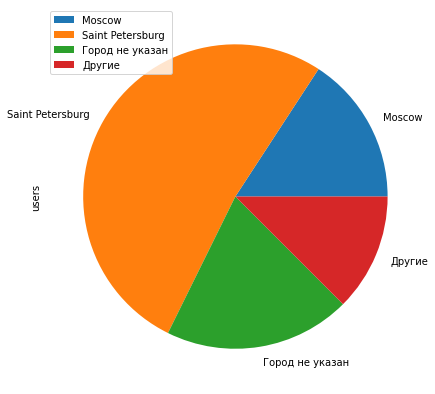

In [17]:
# Визуализируем полученный результат
%matplotlib inline
df.head().plot(kind= 'pie', y= 'users', figsize= (7, 7))

## Блок 07 - Домашнее задание. Топовые посты группы

In [158]:
# Получаем послдение 100 постов сообщества с помощью метода wall.get
import requests
import yaml
from pprint import pprint

with open('config.yaml', 'r') as f:
    config = yaml.full_load(f)
token = config['vk_app_access_token']
url = 'https://api.vk.com/method/wall.get'
params = {
    'domain': 1,
    'filter': 'owner',
    'owner_id': 1,
    'count': 100,
    'offset': 0,
    'access_token': token,
    'v': 5.131
}

data = requests.get(url, params= params)

pprint(data.json())

{'response': {'count': 296,
              'items': [{'comments': {'can_post': 1,
                                      'count': 469410,
                                      'groups_can_post': True},
                         'date': 1525805964,
                         'donut': {'is_donut': False},
                         'edited': 1525813826,
                         'from_id': 1,
                         'hash': 'xTKRWTArhEygtZnIFQ',
                         'id': 2442097,
                         'likes': {'can_like': 1,
                                   'can_publish': 1,
                                   'count': 208663,
                                   'user_likes': 0},
                         'owner_id': 1,
                         'post_source': {'type': 'vk'},
                         'post_type': 'post',
                         'reposts': {'count': 4405, 'user_reposted': 0},
                         'short_text_rate': 0.8,
                         'text': 'Иногда говоря

                                 '30 апреля (понедельник) в Москве:\n'
                                 '\n'
                                 '13:00 – Сбор по адресу ул. Маши Порываевой, '
                                 '38. \n'
                                 '14:00-15:00 – Шествие от ул. Маши '
                                 'Порываевой, 38, до пр. Академика Сахарова. \n'
                                 '15:00-16:00 – Митинг на пр. Академика '
                                 'Сахарова, 9.\n'
                                 '\n'
                                 'Аналогичная акция в Петербурге – 1 мая.',
                         'views': {'count': 2590971}},
                        {'attachments': [{'type': 'video',
                                          'video': {'access_key': '58a4fdf3bd91ac7ebb',
                                                    'can_add': 1,
                                                    'can_add_to_faves': 1,
                                     

                         'likes': {'can_like': 1,
                                   'can_publish': 1,
                                   'count': 48643,
                                   'user_likes': 0},
                         'owner_id': 1,
                         'post_source': {'type': 'vk'},
                         'post_type': 'post',
                         'reposts': {'count': 2894, 'user_reposted': 0},
                         'short_text_rate': 0.8,
                         'text': 'https://www.youtube.com/watch?v=FCbPGhUxDiQ\n'
                                 '(при просмотре нужно включить русские '
                                 'субтитры)',
                         'views': {'count': 3692303}},
                        {'comments': {'can_post': 1,
                                      'count': 6986,
                                      'groups_can_post': True},
                         'date': 1524761880,
                         'donut': {'is_donut': False},
   

                                                               'type': 'p',
                                                               'url': 'https://sun1-94.userapi.com/impf/c845216/v845216315/33ecd/8y5bkHbPrO4.jpg?size=200x200&quality=96&sign=2c57115acd41a560327292c12e148b45&c_uniq_tag=x4JhmhEg0Cvj4QscGT7J-1SovAt5tcFv8orT-rgLvOk&type=album',
                                                               'width': 200},
                                                              {'height': 320,
                                                               'type': 'q',
                                                               'url': 'https://sun1-94.userapi.com/impf/c845216/v845216315/33ecd/8y5bkHbPrO4.jpg?size=320x320&quality=96&sign=df740308273ec94dca9613110cfeb134&c_uniq_tag=rnGDjjnSgVATYl_uvqg2GhiLZ1Qxk57dd507Q3VL1pc&type=album',
                                                               'width': 320},
                                                              {'

                                                                      'album_id': -7,
                                                                      'date': 1519520066,
                                                                      'has_tags': False,
                                                                      'id': 456239216,
                                                                      'owner_id': -35769930,
                                                                      'sizes': [{'height': 92,
                                                                                 'type': 'm',
                                                                                 'url': 'https://sun9-27.userapi.com/sun9-38/impf/c824503/v824503538/cfa8b/oBN7hoNR1xQ.jpg?size=130x92&quality=96&sign=3ae32b14fbc9a63b78996dc178cbb362&c_uniq_tag=9LqfeRedsdRJOk04Ne0yumQEj8yPoyNdmjXqS1Fa4Bc&type=album',
                                                                  

                                   'can_publish': 1,
                                   'count': 41844,
                                   'user_likes': 0},
                         'owner_id': 1,
                         'post_source': {'type': 'vk'},
                         'post_type': 'post',
                         'reposts': {'count': 1018, 'user_reposted': 0},
                         'short_text_rate': 0.8,
                         'text': 'Советник Президента России по вопросам '
                                 'развития интернета заявил о том, что '
                                 'Telegram якобы игнорирует запросы от '
                                 'российских государственных органов, но '
                                 'сотрудничает с властями других стран, '
                                 'например, Индонезии.\n'
                                 '\n'
                                 'Это не так: уровень сотрудничества Telegram '
                                 

                         'short_text_rate': 0.8,
                         'text': 'Согласен с Юрием: русские технологии – '
                                 'лучшие. Жаль, что из-за непродуманных '
                                 'законов русское не всегда конвертируется в '
                                 'российское. \n'
                                 '\n'
                                 'Пока на локальном уровне будут существовать '
                                 'ограничения и риски, бизнес будет уходить в '
                                 'те юрисдикции, где их нет. Надеюсь, '
                                 'когда-нибудь эти ограничения будут сняты, и '
                                 'Россия сможет занять в мире свое подобающее '
                                 'место – место глобального технологического '
                                 'лидера.',
                         'views': {'count': 3666181}},
                        {'comments': {'can_post': 1,
            

                                                   'title': 'Документы, '
                                                            'разоблачающие '
                                                            'заявления А. '
                                                            'Розенберга',
                                                   'url': 'http://telegra.ph/Dokumenty-razoblachayushchie-zayavleniya-A-Rozenberga-09-21'},
                                          'type': 'link'}],
                         'comments': {'can_post': 1,
                                      'count': 6999,
                                      'groups_can_post': True},
                         'date': 1506069418,
                         'donut': {'is_donut': False},
                         'edited': 1506628161,
                         'from_id': 1,
                         'hash': 'v4Cw6gOkCCw9UEyhvg',
                         'id': 2004359,
                         'likes': {'can_like': 1

                                      'groups_can_post': True},
                         'date': 1502807422,
                         'donut': {'is_donut': False},
                         'edited': 1502807958,
                         'from_id': 1,
                         'hash': 'NkXO_0iL1dkcoQ8sEA',
                         'id': 1936565,
                         'likes': {'can_like': 1,
                                   'can_publish': 1,
                                   'count': 30978,
                                   'user_likes': 0},
                         'owner_id': 1,
                         'post_source': {'type': 'vk'},
                         'post_type': 'post',
                         'reposts': {'count': 313, 'user_reposted': 0},
                         'short_text_rate': 0.8,
                         'text': '#PutinShirtlessChallenge '
                                 'https://www.instagram.com/p/BXyV-HiF-pR',
                         'views': {'count': 2571

                                 'команды. \n'
                                 '\n'
                                 'В частности, cейчас СМИ активно цитируют '
                                 'РБК, которые пишут про некие "два клика" для '
                                 'обхода блокировки, ссылаясь на "команду '
                                 'Telegram". Не дайте себя обмануть – все '
                                 'официальные заявления про возможную '
                                 'блокировку или способы ее обхода будут '
                                 'публиковаться централизованно в блоге '
                                 'Telegram на сайте telegram.org.\n'
                                 '\n'
                                 'У команды Telegram нет официальных (или '
                                 'неофициальных) русскоязычных каналов. '
                                 'Единственные обращения на русском языке, '
                                 'связанные с офиц

                                                               'type': 'z',
                                                               'url': 'https://sun1-20.userapi.com/impf/c836333/v836333001/31189/8To0r3d-6iQ.jpg?size=968x1080&quality=96&sign=f52327ecbbdc4365cb1897eb50d56f0b&c_uniq_tag=9MGd9HrYIte-anCZjuC0DtNZP3x8v9wtStBwcPWSPAU&type=album',
                                                               'width': 968}],
                                                    'text': ''},
                                          'type': 'photo'}],
                         'comments': {'can_post': 1,
                                      'count': 20909,
                                      'groups_can_post': True},
                         'date': 1491227748,
                         'donut': {'is_donut': False},
                         'from_id': 1,
                         'hash': '9mDlrnzavGJfirSKlg',
                         'id': 1684450,
                         'likes': {'ca

                                                                        'url': 'https://sun1-90.userapi.com/c837529/v837529001/26b4f/IfLQUUizs_A.jpg',
                                                                        'width': 1280}],
                                                             'text': '',
                                                             'user_id': 100},
                                                   'title': 'Pavel Durov',
                                                   'url': 'https://youtube.com/durov'},
                                          'type': 'link'}],
                         'comments': {'can_post': 1,
                                      'count': 14761,
                                      'groups_can_post': True},
                         'date': 1490221174,
                         'donut': {'is_donut': False},
                         'from_id': 1,
                         'hash': 'hNGV3AYZOWeYg2iHPQ',
                     

                         'from_id': 1,
                         'hash': 'UwjC90w9-3cdzbmK9Q',
                         'id': 1503591,
                         'likes': {'can_like': 1,
                                   'can_publish': 1,
                                   'count': 5440,
                                   'user_likes': 0},
                         'owner_id': 1,
                         'post_source': {'type': 'vk'},
                         'post_type': 'post',
                         'reposts': {'count': 71, 'user_reposted': 0},
                         'short_text_rate': 0.8,
                         'text': 'Вырвиглазные? 🤔',
                         'views': {'count': 2060488}},
                        {'attachments': [{'photo': {'access_key': 'fb073be6f9ceb60334',
                                                    'album_id': -7,
                                                    'date': 1486074059,
                                                    'has_tags':

                                                              {'height': 453,
                                                               'type': 'r',
                                                               'url': 'https://sun1-16.userapi.com/impf/tKattgcO_WHp-5Ivz2qkAN7NT3qsWOl6pzkYjA/_oedTFP9ltQ.jpg?size=510x453&quality=96&sign=e65afe323d88e97362938be596a1cc4a&c_uniq_tag=n5UrVZsTem4wZEVagsUjw_KgZgFcmPznwEQbkALwALI&type=album',
                                                               'width': 510},
                                                              {'height': 67,
                                                               'type': 's',
                                                               'url': 'https://sun1-16.userapi.com/impf/tKattgcO_WHp-5Ivz2qkAN7NT3qsWOl6pzkYjA/_oedTFP9ltQ.jpg?size=75x67&quality=96&sign=3b9ef4fd6c78d9e10b7e32c70633c9d7&c_uniq_tag=BM8bgh1Mz-yNAbharusYASWtEKnkwc9A6l8sqy6qtqQ&type=album',
                                       

                                                               'width': 1280}],
                                                    'text': '4. При просмотре '
                                                            'фотографий '
                                                            'утрачен фокус на '
                                                            'самой картинке. '
                                                            'Фотографии '
                                                            'смещены влево, а '
                                                            'яркое пятно белой '
                                                            'колонки '
                                                            'комментариев, '
                                                            'появившейся '
                                                            'справа, '
                                                            'перетягивает на '

                                 '2. Новости – как и все остальные разделы – '
                                 'стали ниже на 42px. Из-за фиксированной '
                                 'шапки вертикальное пространство сайта стало '
                                 'меньше, нужно больше проматывать. Это '
                                 'серьезное изменение к худшему: именно '
                                 'вертикальный скролл представляет собой '
                                 'дефицит на большинстве дисплеев.\n'
                                 '\n'
                                 '3. При просмотре главного раздела сайта – '
                                 'Новостей – утрачивается фокус на контенте. В '
                                 'новой версии возник визуальный мусор в виде '
                                 'редко используемой фиксированной правой '
                                 'колонки. С учетом фиксированной шапки и '
                                 'узкой шир

                                           'post_source': {'type': 'vk'},
                                           'post_type': 'post',
                                           'signer_id': 1,
                                           'text': 'После тщательного '
                                                   'тестирования подведены '
                                                   'итоги Telegram Android '
                                                   'Challenge 2016. Всего было '
                                                   'прислано 52 конкурсных '
                                                   'приложения. \n'
                                                   '\n'
                                                   '1 место: Адель '
                                                   'Низамутдинов и Евгений '
                                                   'Авсиевич. Каждый из '
                                                   'занявших первое место '

                                                    'sizes': [{'height': 130,
                                                               'type': 'm',
                                                               'url': 'https://sun1-21.userapi.com/impf/c631524/v631524526/28f7c/Y6YQ4aoY9YQ.jpg?size=104x130&quality=96&sign=d3b9f81929ef682854d880bc71aa0f42&c_uniq_tag=5mGW_eRnUQme_2t_irdwl1VujB0UuArVLgI6hRiWe0U&type=album',
                                                               'width': 104},
                                                              {'height': 163,
                                                               'type': 'o',
                                                               'url': 'https://sun1-21.userapi.com/impf/c631524/v631524526/28f7c/Y6YQ4aoY9YQ.jpg?size=130x162&quality=96&sign=39a42a0fecc4f7cd1dba152350e27a7c&c_uniq_tag=KZXLieDyNLJGHCLd9t6yVDURO6OEtjKNme-aKk9mwww&type=album',
                                                               '

                                                                                {'height': 329,
                                                                                 'type': 'p',
                                                                                 'url': 'https://sun9-27.userapi.com/sun9-84/impf/403R0XEEXHlEaNYOMS94KTL8GENRhomEaXzwGg/KlMP1rwSK0U.jpg?size=200x329&quality=96&sign=8176fe543dda29b9ac7cedff56c42886&c_uniq_tag=53SGuNovdKgp33-qsq0RmPFCIKwxW0fvtrQljzC41go&type=album',
                                                                                 'width': 200},
                                                                                {'height': 526,
                                                                                 'type': 'q',
                                                                                 'url': 'https://sun9-27.userapi.com/sun9-84/impf/403R0XEEXHlEaNYOMS94KTL8GENRhomEaXzwGg/KlMP1rwSK0U.jpg?size=320x526&quality=96&

                                                    'sizes': [{'height': 130,
                                                               'type': 'm',
                                                               'url': 'https://sun1-56.userapi.com/impf/E7Q90WPJSZ_gmXgDX_6JLQ7zW7C0XIMljrXdUg/YZs_nTjIe-0.jpg?size=92x130&quality=96&sign=e2f132ae720c6d6f74dcd2b9711dcf45&c_uniq_tag=IR0MyoeK1MeocYu3alD2V8QlcD-FTh7M-6_sqYeEVWM&type=album',
                                                               'width': 92},
                                                              {'height': 184,
                                                               'type': 'o',
                                                               'url': 'https://sun1-56.userapi.com/impf/E7Q90WPJSZ_gmXgDX_6JLQ7zW7C0XIMljrXdUg/YZs_nTjIe-0.jpg?size=130x184&quality=96&sign=fa40436d39084d3c6ac8d2a4188219ca&c_uniq_tag=cq-5I2EIenjUtQP-lNRpsZr_3gkAHbi7cU-8mjuVulk&type=album',
                                      

                                      'groups_can_post': True},
                         'date': 1455216268,
                         'donut': {'is_donut': False},
                         'edited': 1455216423,
                         'from_id': 1,
                         'hash': 'YwMteOFdoZsa0U7VtQ',
                         'id': 815649,
                         'likes': {'can_like': 1,
                                   'can_publish': 1,
                                   'count': 41113,
                                   'user_likes': 0},
                         'owner_id': 1,
                         'post_source': {'type': 'vk'},
                         'post_type': 'post',
                         'reposts': {'count': 756, 'user_reposted': 0},
                         'short_text_rate': 0.8,
                         'text': 'Запускаем конкурс среди художников СНГ на '
                                 'создание стикеров. Суммарный бюджет – '
                                 '

                                                                                 'url': 'https://sun9-27.userapi.com/sun9-78/impf/16fb5jKjP8A-eK4FZmewZ8vF5lSRbX8fwGY_cA/pgkSyF_m-UQ.jpg?size=686x1080&quality=96&sign=c9f81a69884510b603bae051a0ef6a88&c_uniq_tag=BXqP6Tv2p5aLQFx8KTsOcxscq04Sln6l48_yKkt150M&type=album',
                                                                                 'width': 686}],
                                                                      'text': '',
                                                                      'user_id': 100},
                                                            'type': 'photo'},
                                                           {'photo': {'access_key': '8a44753386a2341bf9',
                                                                      'album_id': -7,
                                                                      'date': 1454349473,
                                                          

                                                   'над сообщением\n'
                                                   '- Режим выделения '
                                                   'нескольких сообщений для '
                                                   'последующего удаления или '
                                                   'пересылки\n'
                                                   '- Свайп влево для быстрого '
                                                   'перехода к ответу на '
                                                   'сообщение\n'
                                                   '- Режим ответа на '
                                                   'сообщение\n'
                                                   '- Отображение ответа на '
                                                   'сообщение в чате\n'
                                                   '- Свайп вправо для быстрой '
                                             

                                                            'самых успешных '
                                                            'бизнесменов '
                                                            'России до 40 лет '
                                                            'по версии '
                                                            '«Секрета фирмы»',
                                                   'url': 'https://vc.ru/p/sf-young-rating-2015'},
                                          'type': 'link'}],
                         'comments': {'can_post': 1,
                                      'count': 43393,
                                      'groups_can_post': True},
                         'date': 1448431475,
                         'donut': {'is_donut': False},
                         'from_id': 1,
                         'hash': 'rqDhlsLFi99X03I_SQ',
                         'id': 593585,
                         'likes': {'can_like': 1,
  

                                                                                 'type': 'p',
                                                                                 'url': 'https://sun9-27.userapi.com/sun9-54/impf/c6025/v6025688/16c98/IdmJn7KRciA.jpg?size=200x200&quality=96&sign=0157e778dddd3910bc429e36286874e6&c_uniq_tag=juyqU37iDB25liJXSa8jW9cCOPBKvO9gmRBkxA5Yk0E&type=album',
                                                                                 'width': 200},
                                                                                {'height': 320,
                                                                                 'type': 'q',
                                                                                 'url': 'https://sun9-27.userapi.com/sun9-54/impf/c6025/v6025688/16c98/IdmJn7KRciA.jpg?size=320x320&quality=96&sign=dddf0f9d733756c033f6ac0905c4dcf1&c_uniq_tag=dlwVlHTBETzM5MY0uPGpcZ46m2GGhO7fZU3VCp_AZMo&type=album',
                          

                                                               'url': 'https://sun1-91.userapi.com/impf/c623123/v623123957/43c34/RwM6fZNr-Y4.jpg?size=807x807&quality=96&sign=f58cfd8601217e8dd06bae20fb9cde3e&c_uniq_tag=FmaY8v6CbEJvvO9VH3uCwm6T622sd_52JU81ewQXAUM&type=album',
                                                               'width': 807},
                                                              {'height': 1024,
                                                               'type': 'z',
                                                               'url': 'https://sun1-91.userapi.com/impf/c623123/v623123957/43c34/RwM6fZNr-Y4.jpg?size=1080x1080&quality=96&sign=a939cb208fd265177c998104c7679ab9&c_uniq_tag=ltPlFJ_MSABpkjZTs35UCuK75TclvJ8-lul_1GMtyqM&type=album',
                                                               'width': 1024}],
                                                    'text': 'Original: '
                                                            'h

                                 'работает, второй – нет.\n'
                                 '\n'
                                 'Как только Вы смещаете фокус с саморазвития '
                                 'на конкурентов, Вы впускаете в себя страх '
                                 'перед ними. Вы неосознанно приближаете то, '
                                 'чего боитесь. Страх – это самосбывающееся '
                                 'пророчество.\n'
                                 '\n'
                                 'https://instagram.com/p/57jkzBr7Tr/'},
                        {'attachments': [{'photo': {'access_key': '39f47f6ae83afe43fb',
                                                    'album_id': -7,
                                                    'date': 1437521382,
                                                    'has_tags': False,
                                                    'id': 374991175,
                                                    'owne

                                                                        'type': 'k',
                                                                        'url': 'https://sun9-27.userapi.com/sun9-86/c627331/v627331512/e2e9/pNZeVociB2U.jpg',
                                                                        'width': 1024},
                                                                       {'height': 240,
                                                                        'type': 'l',
                                                                        'url': 'https://sun9-27.userapi.com/sun9-44/c627331/v627331512/e2e8/SvV1ObLgxjU.jpg',
                                                                        'width': 537},
                                                                       {'height': 98,
                                                                        'type': 'm',
                                                                        'url': 'h

In [159]:
# Собираем нужную нам статистику в словарь. Ключ - название статьи, необходимые данные: время публикации,
# количество лайков, репостов и коментариев

stats = {}
i = 0
for record in data.json()['response']['items']:
        if 'attachments' in record:
        #print(i, record['attachments'][0]['type'])
            if 'video' in record['attachments'][0]['type']:
                title = 'Запись №' + str(i) + ' Видео - ' + str(record['attachments'][0]['video']['title'])
            elif 'photo' in record['attachments'][0]['type']:
                title = 'Запись №' + str(i) + ' Фотографии "без заголовка" - id=' + str(record['id'])
            elif 'link' in record['attachments'][0]['type']:
                title = 'Запись №' + str(i) + ' Ссылка - ' + str(record['attachments'][0]['link']['title'])
            elif 'poll' in record['attachments'][0]['type']:
                title = 'Запись №' + str(i) + ' Опрос - ' + str(record['attachments'][0]['poll']['question'])
        #if 'text' in record['attachments'][0]['type']:
        #    print(record['attachments'][0]['text']['title'])
        else:
            if 'text' in record:
                title = 'Запись №' + str(i) + ' Текст - ' + str(record['text'][:20])
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'],
                     record['date'], (int(record['comments']['count']) +
                                           int(record['likes']['count']) +
                                           int(record['reposts']['count']))]
    # photo, link, video, text
        i += 1

In [160]:
# Сортируем словарь по количеству комментариев и оставим ТОП-10
for title, line in sorted(stats.items(), key = lambda x: -x[1][0])[:10]:
    print(title, line)

Запись №0 Текст - Иногда говорят, что  [469410, 208663, 4405, 1525805964, 682478]
Запись №59 Текст - Прошло 10 лет. Публи [120940, 163359, 15243, 1476086873, 299542]
Запись №19 Текст - Советник Президента  [105997, 41844, 1018, 1509059043, 148859]
Запись №96 Фотографии "без заголовка" - id=58140 [78434, 109183, 2729, 1437521614, 190346]
Запись №71 Видео - Telegram founder: Opening 'back door' to encrypted apps could aid terrorists [71446, 30634, 619, 1456421536, 102699]
Запись №93 Текст - Зло – как и добро –  [65803, 90424, 5960, 1438716988, 162187]
Запись №88 Текст -  [52058, 42269, 3519, 1440934881, 97846]
Запись №62 Фотографии "без заголовка" - id=1184057 [49684, 138126, 9275, 1471445167, 197085]
Запись №84 Фотографии "без заголовка" - id=472308 [48146, 88186, 354, 1445808972, 136686]
Запись №76 Фотографии "без заголовка" - id=730207 [47442, 129359, 628, 1452540014, 177429]


In [161]:
# Сортируем словарь по общей сумме коментариев, лайков и репостов комментариев и оставим ТОП-10
# Для проверки в словаре добавил новый(последний) столбец с суммой этих показателей
for title, line in sorted(stats.items(), key = lambda x: -(x[1][0]+x[1][1]+x[1][2]))[:10]:
    print(title, line)

Запись №0 Текст - Иногда говорят, что  [469410, 208663, 4405, 1525805964, 682478]
Запись №59 Текст - Прошло 10 лет. Публи [120940, 163359, 15243, 1476086873, 299542]
Запись №81 Текст - Предлагаю запретить  [17906, 213257, 8780, 1447677107, 239943]
Запись №62 Фотографии "без заголовка" - id=1184057 [49684, 138126, 9275, 1471445167, 197085]
Запись №15 Текст - Спасибо за поддержку [19459, 173202, 4239, 1523971038, 196900]
Запись №96 Фотографии "без заголовка" - id=58140 [78434, 109183, 2729, 1437521614, 190346]
Запись №76 Фотографии "без заголовка" - id=730207 [47442, 129359, 628, 1452540014, 177429]
Запись №16 Текст - Сегодня утром власти [12331, 160727, 4160, 1523881233, 177218]
Запись №93 Текст - Зло – как и добро –  [65803, 90424, 5960, 1438716988, 162187]
Запись №19 Текст - Советник Президента  [105997, 41844, 1018, 1509059043, 148859]


In [162]:
# Переведём дату публикации из UNIX-Time в читаемую дату
from datetime import datetime, timedelta

for title, line in stats.items():
    line.append(datetime.fromtimestamp(line[3]).strftime('%Y-%m-%d'))
    print(line)

[469410, 208663, 4405, 1525805964, 682478, '2018-05-08']
[13834, 23676, 614, 1525352753, 38124, '2018-05-03']
[10223, 102740, 1392, 1525187997, 114355, '2018-05-01']
[6961, 45277, 489, 1525168885, 52727, '2018-05-01']
[5455, 27101, 883, 1525107823, 33439, '2018-04-30']
[9645, 86001, 2093, 1525090324, 97739, '2018-04-30']
[2798, 12507, 301, 1525048713, 15606, '2018-04-30']
[3657, 21302, 450, 1525012261, 25409, '2018-04-29']
[2212, 21930, 891, 1525009304, 25033, '2018-04-29']
[9372, 48643, 2894, 1524838659, 60909, '2018-04-27']
[6986, 38226, 983, 1524761880, 46195, '2018-04-26']
[15172, 48587, 1567, 1524440871, 65326, '2018-04-23']
[5875, 38994, 1001, 1524439551, 45870, '2018-04-23']
[9026, 90497, 2457, 1524402346, 101980, '2018-04-22']
[13244, 88535, 1743, 1524147382, 103522, '2018-04-19']
[19459, 173202, 4239, 1523971038, 196900, '2018-04-17']
[12331, 160727, 4160, 1523881233, 177218, '2018-04-16']
[11754, 106966, 4736, 1523619298, 123456, '2018-04-13']
[36621, 16285, 269, 1519549711, 

In [163]:
# Предположим что вчера было 2018-05-01
yesterday = '2018-05-01'
# yesterday = (datetime.now() - timedelta(days = 1)).strftime('%Y-%m-%d')
print(yesterday)

2018-05-01


In [169]:
# Выведем обновленный рейтинг постов за "вчерашний день" line[4] меняем на line[5] т.к. ранее был добавлен
# ещё один столбец
for title, line in sorted(stats.items(), key = lambda x: -(x[1][0]+x[1][1]+x[1][2])):
    if line[5] == yesterday:
        print(title, line)

Запись №2 Фотографии "без заголовка" - id=2422169 [10223, 102740, 1392, 1525187997, 114355, '2018-05-01']
Запись №3 Текст - Наблюдаю, как несмот [6961, 45277, 489, 1525168885, 52727, '2018-05-01']


In [172]:
import requests
import yaml
from pprint import pprint

with open('config.yaml', 'r') as f:
    config = yaml.full_load(f)
token = config['vk_app_access_token']
url = 'https://api.vk.com/method/wall.get'
params = {
    'domain': 'habr',
    'filter': 'owner',
    'owner_id': 'habr',
    'count': 100,
    'offset': 0,
    'access_token': token,
    'v': 5.131
}

data = requests.get(url, params= params)

pprint(data.json())

{'error': {'error_code': 100,
           'error_msg': 'One of the parameters specified was missing or '
                        'invalid: owner_id not integer',
           'request_params': [{'key': 'domain', 'value': 'habr'},
                              {'key': 'filter', 'value': 'owner'},
                              {'key': 'owner_id', 'value': 'habr'},
                              {'key': 'count', 'value': '100'},
                              {'key': 'offset', 'value': '0'},
                              {'key': 'v', 'value': '5.131'},
                              {'key': 'method', 'value': 'wall.get'},
                              {'key': 'oauth', 'value': '1'}]}}
